# Machine Learning Fundamentals
### Hesus Garcia
## Leccion 4 - Clasificación (Parte 1)
### Usando los modelos para predecir si un tumor cancerigeno es benigno o maligno
Se importanlas paqueterias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
#import sklearn

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

## Matriz de confusion

In [2]:

y = np.array([0,1,0,1,0,0,1,0,0,1,0,1,1,0,1])
yest = np.array([0,1,0,0,1,0,1,0,0,1,0,1,0,0,1])

print('Confusion Matrix: \n', confusion_matrix(y, yest))
print('Confusion Report: \n', classification_report(y, yest))

Confusion Matrix: 
 [[7 1]
 [2 5]]
Confusion Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7

    accuracy                           0.80        15
   macro avg       0.81      0.79      0.80        15
weighted avg       0.80      0.80      0.80        15



## Curva ROC

AUC:  0.9


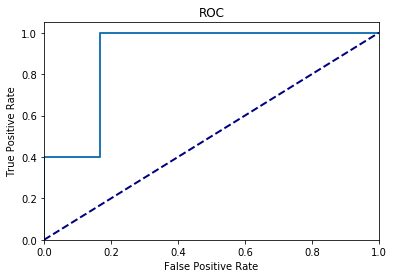

In [3]:
y = np.array([0,0,0,0,0,0,1,1,1,1,1])
y_prob = np.array([0.000001,0.015,0.025,0.08,0.23,0.95,0.39,0.79,0.91,0.98,0.9998])

fpr, tpr, thresholds = roc_curve(y, y_prob)
print('AUC: ', roc_auc_score(y, y_prob))

plt.figure()
lw = 2
plt.plot(fpr, tpr, lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## Clasificación de tumores cancerigenos

Se leen los datos

In [4]:
url = 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/ReconocimientoPatrones/master/Datasets/cancer.csv'
df = pd.read_csv(url,parse_dates=[0])

# Toma las columnas del dataframe y las convierte a numeros
df_columns = df.columns
for i in df_columns:
    df[i] = pd.to_numeric(df[i])

x = np.asanyarray(df.drop(columns=['Class']))
y = np.asanyarray(df[['Class']])
print(x.shape, y.shape)

(683, 9) (683, 1)


Se hace la separación de los datos

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

Se crea el modelo y se entrena

Train:  0.97265625
Test:  0.9649122807017544
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       190
           1       0.98      0.98      0.98       322

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.98      0.98      0.98       122

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



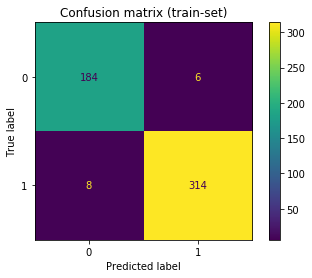

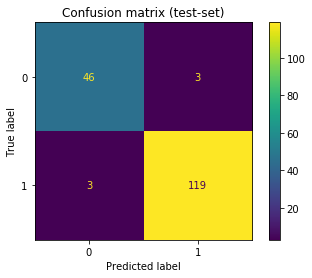

In [8]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', Perceptron())])

model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))

Train:  0.97265625
Test:  0.9707602339181286
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.98      0.98      0.98       322

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        49
           1       0.98      0.98      0.98       122

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.97      0.97       171



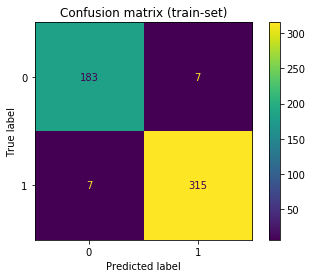

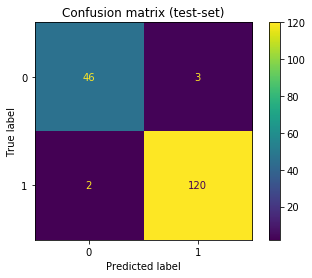

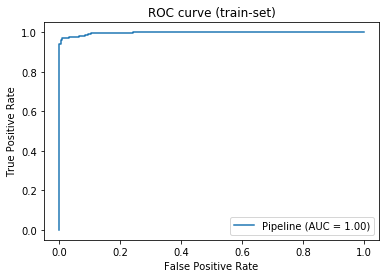

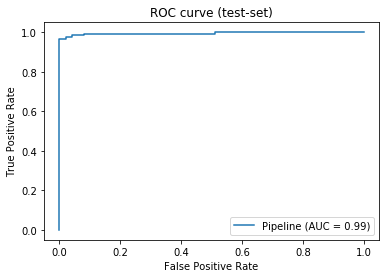

In [9]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', LogisticRegression())])

model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

plot_roc_curve(model,xtrain, ytrain)
plt.title('ROC curve (train-set)')

plot_roc_curve(model,xtest, ytest)
plt.title('ROC curve (test-set)')


print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))

## Clasificador de diabetes

Se leen los datos

In [12]:
url = 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/ReconocimientoPatrones/master/Datasets/diabetes.csv'
df = pd.read_csv(url,parse_dates=[0])

# Toma las columnas del dataframe y las convierte a numeros
df_columns = df.columns
for i in df_columns:
    df[i] = pd.to_numeric(df[i])

x = np.asanyarray(df.drop(columns=['Outcome']))
y = np.asanyarray(df[['Outcome']])
print(x.shape, y.shape)

(768, 8) (768, 1)


Se hace la separación de datos

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

Se crea el modelo y se entrena

Train:  0.640625
Test:  0.6510416666666666
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.77      0.65      0.70       379
           1       0.48      0.62      0.54       197

    accuracy                           0.64       576
   macro avg       0.62      0.64      0.62       576
weighted avg       0.67      0.64      0.65       576

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       121
           1       0.52      0.70      0.60        71

    accuracy                           0.65       192
   macro avg       0.65      0.66      0.65       192
weighted avg       0.68      0.65      0.66       192



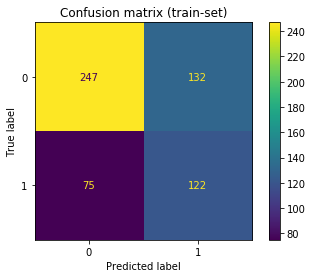

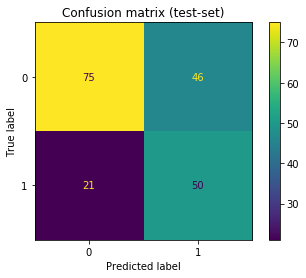

In [14]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', Perceptron())])

model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))

Train:  0.7899305555555556
Test:  0.7083333333333334
Classification Train-Set Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       379
           1       0.74      0.59      0.66       197

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576

Classification Test-Set Report: 
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       121
           1       0.62      0.55      0.58        71

    accuracy                           0.71       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.70      0.71      0.70       192



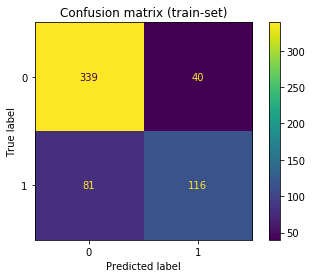

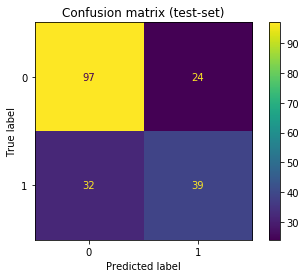

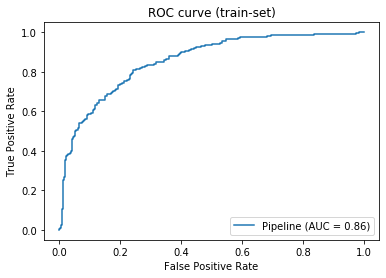

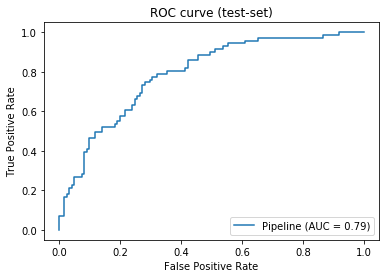

In [15]:
model = Pipeline([('scaler', StandardScaler()),
                  ('classifier', LogisticRegression())])

model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

plot_confusion_matrix(model, xtrain, ytrain)
plt.title('Confusion matrix (train-set)')

plot_confusion_matrix(model, xtest, ytest)
plt.title('Confusion matrix (test-set)')

plot_roc_curve(model,xtrain, ytrain)
plt.title('ROC curve (train-set)')

plot_roc_curve(model,xtest, ytest)
plt.title('ROC curve (test-set)')


print('Classification Train-Set Report: \n', 
      classification_report(ytrain, model.predict(xtrain)))

print('Classification Test-Set Report: \n', 
      classification_report(ytest, model.predict(xtest)))